# Bước 1: import thư viện


In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

# Bước 2: Đọc dữ liệu


In [ ]:
#tạo quyền truy cập với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# đọc dữ liệu từ file csv
df = pd.read_csv('/content/drive/MyDrive/dataset/Dữ liệu Lịch sử VNM 2014_2024.csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày   Đóng cửa     Mở cửa   Cao nhất Thấp nhất
0     27/03/2024   67,600.0   67,700.0   70,400.0  66,500.0
1     26/03/2024   67,700.0   67,600.0   67,900.0  67,300.0
2     25/03/2024   67,300.0   67,900.0   68,200.0  65,800.0
3     22/03/2024   67,800.0   69,300.0   72,500.0  67,800.0
4     21/03/2024   68,400.0   68,200.0   68,500.0  67,900.0
...          ...        ...        ...        ...       ...
2491  04/04/2014  100,694.0  100,000.0  100,694.0  99,305.0
2492  03/04/2014  100,000.0   97,917.0  100,694.0  97,917.0
2493  02/04/2014   97,917.0   97,917.0   98,611.0  97,222.0
2494  01/04/2014   97,917.0   98,611.0   98,611.0  97,222.0
2495  31/03/2014   97,917.0   98,611.0   99,305.0  97,917.0

[2496 rows x 5 columns]


# Bước 3: Mô tả dữ liệu

In [ ]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [ ]:
#kích thước dữ liệu
df.shape

(2496, 5)

In [ ]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2024-03-27,"67,600.0","67,700.0","70,400.0","66,500.0"
1,2024-03-26,"67,700.0","67,600.0","67,900.0","67,300.0"
2,2024-03-25,"67,300.0","67,900.0","68,200.0","65,800.0"
3,2024-03-22,"67,800.0","69,300.0","72,500.0","67,800.0"
4,2024-03-21,"68,400.0","68,200.0","68,500.0","67,900.0"


In [ ]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2496
mean,2019-03-30 01:34:02.307692288
min,2014-03-31 00:00:00
25%,2016-09-28 18:00:00
50%,2019-04-01 12:00:00
75%,2021-09-27 06:00:00
max,2024-03-27 00:00:00


# Bước 4: Tiền xử lý dữ liệu

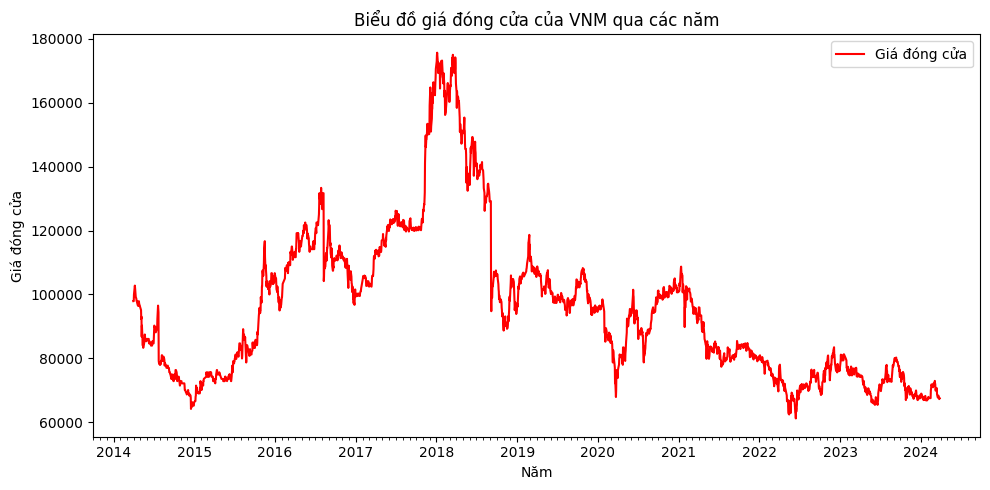

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [ ]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2014-03-31,97917.0
2014-04-01,97917.0
2014-04-02,97917.0
2014-04-03,100000.0
2014-04-04,100694.0
...,...
2024-03-21,68400.0
2024-03-22,67800.0
2024-03-25,67300.0


In [ ]:
#chia tập dữ liệu
data = df1.values
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [ ]:
data

array([[97917.],
       [97917.],
       [97917.],
       ...,
       [67300.],
       [67700.],
       [67600.]])

In [ ]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)
print(sc_train)

[[0.32065757]
 [0.32065757]
 [0.32065757]
 ...
 [0.05283425]
 [0.05633326]
 [0.05545851]]


In [ ]:
#tạo các giá trị tham số
best_time_steps = 5
best_model_units = 256
best_model_dropout = 0.2
best_batch_size = 16
best_epochs = 37
time_steps = best_time_steps
model_units = best_model_units
model_dropout = best_model_dropout
batch_size = best_batch_size
epochs = best_epochs

In [ ]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]

for i in range(time_steps,len(train_data)):
  x_train.append(sc_train[i-time_steps:i,0]) #lấy time_steps giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [ ]:
x_train

[array([0.32065757, 0.32065757, 0.32065757, 0.33887869, 0.34494948]),
 array([0.32065757, 0.32065757, 0.33887869, 0.34494948, 0.36317934]),
 array([0.32065757, 0.33887869, 0.34494948, 0.36317934, 0.35709981]),
 array([0.33887869, 0.34494948, 0.36317934, 0.35709981, 0.33887869]),
 array([0.34494948, 0.36317934, 0.35709981, 0.33887869, 0.33279915]),
 array([0.36317934, 0.35709981, 0.33887869, 0.33279915, 0.32672836]),
 array([0.35709981, 0.33887869, 0.33279915, 0.32672836, 0.32065757]),
 array([0.33887869, 0.33279915, 0.32672836, 0.32065757, 0.32065757]),
 array([0.33279915, 0.32672836, 0.32065757, 0.32065757, 0.32065757]),
 array([0.32672836, 0.32065757, 0.32065757, 0.32065757, 0.31457803]),
 array([0.32065757, 0.32065757, 0.32065757, 0.31457803, 0.30850724]),
 array([0.32065757, 0.32065757, 0.31457803, 0.30850724, 0.31457803]),
 array([0.32065757, 0.31457803, 0.30850724, 0.31457803, 0.30850724]),
 array([0.31457803, 0.30850724, 0.31457803, 0.30850724, 0.30850724]),
 array([0.30850724, 

In [ ]:
y_train

[0.36317934461707224,
 0.3570998067669193,
 0.3388786882894106,
 0.33279915043925756,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.30850724164807086,
 0.30850724164807086,
 0.32065756981190174,
 0.30850724164807086,
 0.30850724164807086,
 0.2963569134842401,
 0.27205625715657833,
 0.2781270474702562,
 0.22345494450125492,
 0.2538351386790695,
 0.21738415418757695,
 0.19916303571006821,
 0.21738415418757695,
 0.1930834978599152,
 0.19916303571006821,
 0.20523382602374607,
 0.21131336387389899,
 0.22345494450125492,
 0.22953448235140783,
 0.22345494450125492,
 0.21131336387389899,
 0.21738415418757695,
 0.21131336387389899,
 0.21131336387389899,
 0.21131336387389899,
 0.21738415418757695,
 0.21738415418757695,
 0.21738415418757695,
 0.21738415418757695,
 0.21738415418757695,
 0.21738415418757695,
 0.20523382602374607,
 0.20523382602374607,
 0.21131336387389899,
 0.2052338260237460

In [ ]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))




# Bước 5: Xây dựng và huấn luyện mô hình

In [ ]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=model_units,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=int(model_units/2)))
model.add(Dropout(model_dropout)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
#huấn luyện mô hình
save_model = "/content/drive/MyDrive/save_Model/VNM/save_model_VNM_2_2014_2024.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=2,callbacks=[best_model])

Epoch 1/37

Epoch 1: loss improved from inf to 0.04231, saving model to /content/drive/MyDrive/save_Model/VNM/save_model_VNM_2_2014_2024.hdf5
125/125 - 8s - loss: 0.0423 - 8s/epoch - 65ms/step
Epoch 2/37


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.04231 to 0.02531, saving model to /content/drive/MyDrive/save_Model/VNM/save_model_VNM_2_2014_2024.hdf5
125/125 - 3s - loss: 0.0253 - 3s/epoch - 21ms/step
Epoch 3/37

Epoch 3: loss did not improve from 0.02531
125/125 - 3s - loss: 0.0255 - 3s/epoch - 20ms/step
Epoch 4/37

Epoch 4: loss improved from 0.02531 to 0.02275, saving model to /content/drive/MyDrive/save_Model/VNM/save_model_VNM_2_2014_2024.hdf5
125/125 - 3s - loss: 0.0227 - 3s/epoch - 25ms/step
Epoch 5/37

Epoch 5: loss improved from 0.02275 to 0.02182, saving model to /content/drive/MyDrive/save_Model/VNM/save_model_VNM_2_2014_2024.hdf5
125/125 - 4s - loss: 0.0218 - 4s/epoch - 34ms/step
Epoch 6/37

Epoch 6: loss did not improve from 0.02182
125/125 - 3s - loss: 0.0234 - 3s/epoch - 20ms/step
Epoch 7/37

Epoch 7: loss did not improve from 0.02182
125/125 - 3s - loss: 0.0220 - 3s/epoch - 20ms/step
Epoch 8/37

Epoch 8: loss did not improve from 0.02182
125/125 - 3s - loss: 0.0235 - 3s/epoch - 21ms/s

In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("/content/drive/MyDrive/save_Model/VNM/save_model_VNM_2_2014_2024.hdf5")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

63/63 [==============================] - 2s 15ms/step


# Bước 6: Tái sử dụng mô hình

In [ ]:
#xử lý dữ liệu test
test = df1[len(train_data)-time_steps:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(time_steps,test.shape[0]):
  x_test.append(sc_test[i-time_steps:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[train_size:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

16/16 [==============================] - 0s 9ms/step


# Bước 7: Tái sử dụng mô hình

<ipython-input-33-bf9ef1495148>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
<ipython-input-33-bf9ef1495148>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


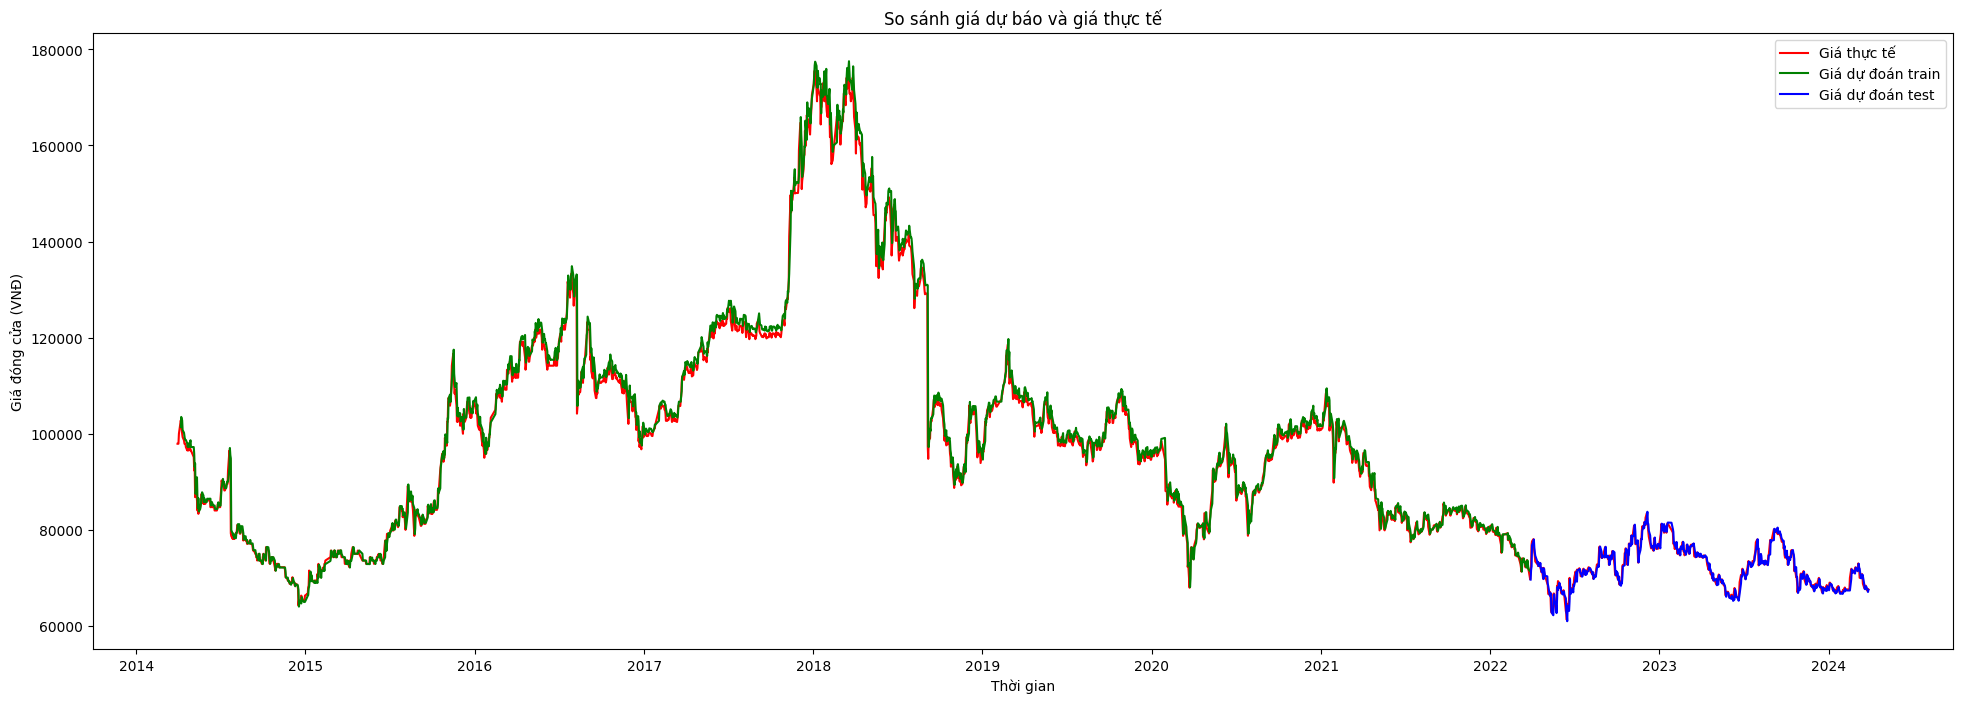

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[time_steps:train_size]
test_data1 = df1[train_size:]
result = [] #lưu kết quả dự đoán
plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.9912214320127714
Sai số tuyệt đối trung bình trên tập train (VNĐ): 1382.441589496484
Phần trăm sai số tuyệt đối trung bình tập train: 0.013224213033388377


In [ ]:
train_data1

,Đóng cửa,Dự đoán
Ngày,,
2014-06-13,84722.0,84646.046875
2014-06-16,84722.0,84157.195312
2014-06-17,84722.0,84053.539062
2014-06-18,84722.0,84047.359375
2014-06-19,84028.0,84044.031250
...,...,...
2022-03-22,73037.2,72788.257812
2022-03-23,72277.4,72554.101562
2022-03-24,71802.5,71874.101562


In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.9340287582748841
Sai số tuyệt đối trung bình trên tập test (VNĐ): 793.5653125000001
Phần trăm sai số tuyệt đối trung bình tập test: 0.010965603720432543


In [ ]:
#lưu kết quả ra file csv
result = []
result.append((time_steps,model_units,model_dropout,batch_size,epochs,mean_absolute_error(y_test,y_test_predict)))
result = pd.DataFrame(result,columns=['time_steps','model_units','model_dropout','batch_size','epochs','MAE'])
result.to_csv('/content/drive/MyDrive/Kết Quả/VNM/Ket_Qua_Toi_Uu_VNM_2_2014_2024.csv',index=False)


In [ ]:
test_data1

,Đóng cửa,Dự đoán
Ngày,,
2022-03-29,71707.5,69577.687500
2022-03-30,72372.4,70722.960938
2022-03-31,76836.3,71572.742188
2022-04-01,77596.1,75180.375000
2022-04-04,78071.0,76626.593750
...,...,...
2024-03-21,68400.0,67402.281250
2024-03-22,67800.0,67725.062500
2024-03-25,67300.0,67360.046875


# Bước 8: Độ chính xác của mô hình

1/1 [==============================] - 0s 23ms/step


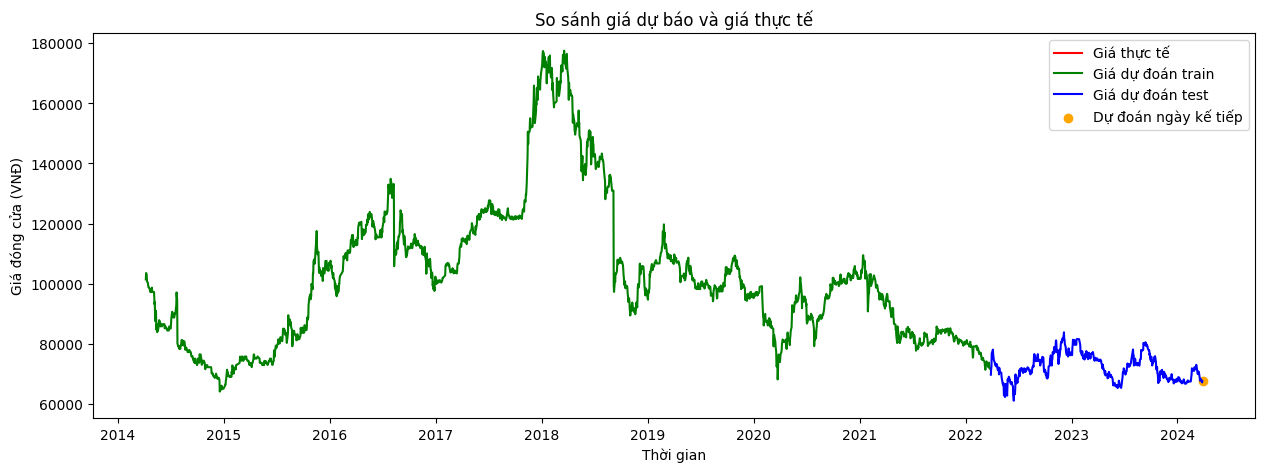

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-time_steps:, 0]])  # Lấy time_steps giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()

In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

        Ngày   Giá dự đoán  Giá ngày trước
0 2024-03-28  67411.867188         67600.0
